In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = './energy_demand_hourly_brazil.csv'
data = pd.read_csv(file_path)
data.head()

,index,hourly_demand
0,2000-01-01 00:00:00,34673.9
1,2000-01-01 01:00:00,33503.0
2,2000-01-01 02:00:00,32287.6
3,2000-01-01 03:00:00,31059.4
4,2000-01-01 04:00:00,30272.7


In [3]:
data.shape

(201317, 2)

In [4]:
# Verificando se há dados faltantes na tabela
missing_data = data.isnull().any().any()
missing_data

False

In [5]:
# Converter a coluna 'index' para datetime
data['index'] = pd.to_datetime(data['index'])

# Criar uma coluna com apenas a data
data['date'] = data['index'].dt.date

print(data['date'] )

0         2000-01-01
1         2000-01-01
2         2000-01-01
3         2000-01-01
4         2000-01-01
             ...    
201312    2022-12-31
201313    2022-12-31
201314    2022-12-31
201315    2022-12-31
201316    2022-12-31
Name: date, Length: 201317, dtype: object


In [6]:
# Agrupar pela data e calcular a média de consumo diário
daily_mean = data.groupby('date', as_index=False)['hourly_demand'].mean()

# Renomear as colunas para clareza
daily_mean.rename(columns={'hourly_demand': 'daily_mean_demand'}, inplace=True)

# Exibir as primeiras linhas da nova tabela
daily_mean.head()

,date,daily_mean_demand
0,2000-01-01,30736.529167
1,2000-01-02,31453.354167
2,2000-01-03,37466.737500
3,2000-01-04,39149.970833
4,2000-01-05,39961.879167


In [7]:
daily_mean.shape

(8389, 2)

In [8]:
daily_mean.describe()

,daily_mean_demand
count,8389.000000
mean,54390.890471
std,10573.624261
min,26656.475000
25%,45713.733333
50%,54499.290917
75%,62565.246792
max,80438.151750


In [9]:
# Adicionar uma coluna de mês e ano
daily_mean['date'] = pd.to_datetime(daily_mean['date'])
daily_mean['month'] = daily_mean['date'].dt.month
daily_mean['year'] = daily_mean['date'].dt.year

# Agrupar por ano e mês para calcular a média mensal
monthly_mean = daily_mean.groupby(['year', 'month'], as_index=False)['daily_mean_demand'].mean()

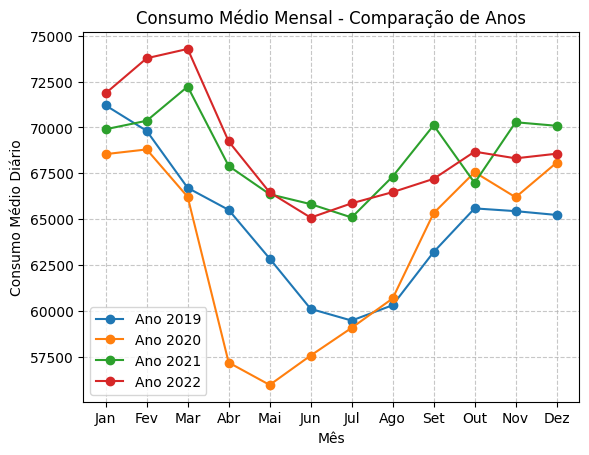

In [10]:
years = [2019, 2020, 2021, 2022]  # Substitua pelos anos que deseja comparar
for year in years:
    year_data = monthly_mean[monthly_mean['year'] == year]
    plt.plot(year_data['month'], year_data['daily_mean_demand'], marker='o', label=f'Ano {year}')

plt.title('Consumo Médio Mensal - Comparação de Anos')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio Diário')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

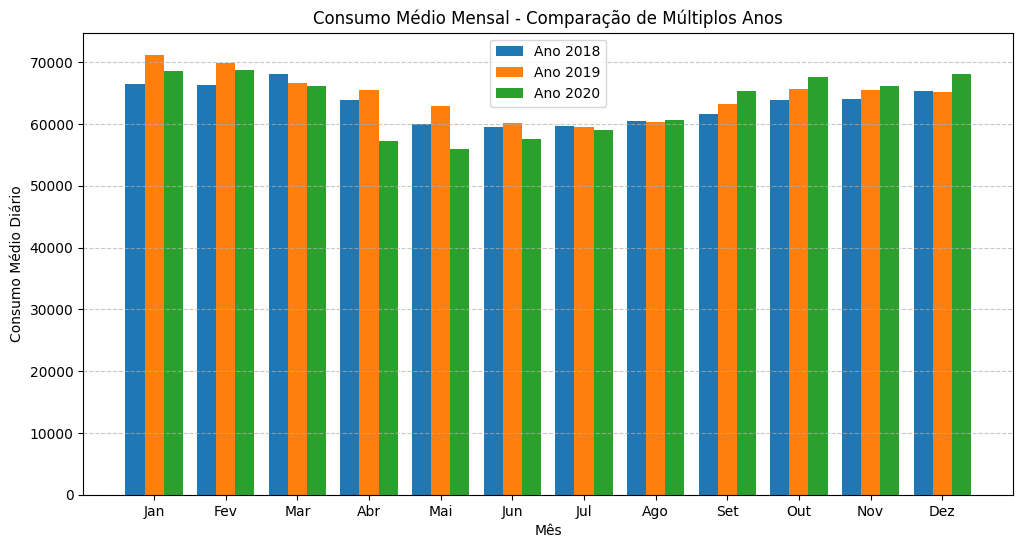

In [11]:
# Lista dos anos a serem comparados
years = [2018, 2019, 2020]  # Adicione os anos desejados aqui

# Dados para os anos selecionados
filtered_data = monthly_mean[monthly_mean['year'].isin(years)]

# Configurar os dados para o gráfico
bar_width = 0.8 / len(years)  # Ajustar a largura das barras com base no número de anos
x = np.arange(1, 13)  # Meses (1 a 12)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
for i, year in enumerate(years):
    year_data = filtered_data[filtered_data['year'] == year]
    plt.bar(x + i * bar_width, year_data['daily_mean_demand'], width=bar_width, label=f'Ano {year}')

# Configurar o gráfico
plt.title('Consumo Médio Mensal - Comparação de Múltiplos Anos')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio Diário')
plt.xticks(x + (bar_width * (len(years) - 1)) / 2, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig('histograma_meses_anos.png')
plt.show()


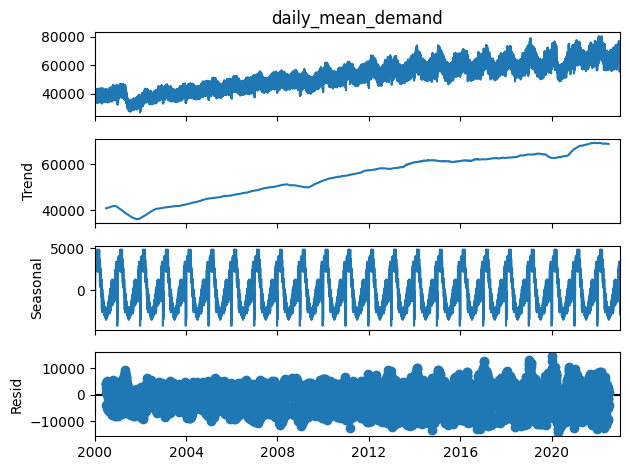

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Certifique-se de que os dados estejam ordenados e no formato datetime
daily_mean.set_index('date', inplace=True)

# Decompor uma série temporal (exemplo: dados de 2018)
result = seasonal_decompose(daily_mean['daily_mean_demand'], model='additive', period=365)
result.plot()
# plt.savefig('sasonalidade.png')
plt.show()


In [13]:
# Recriar daily_mean a partir dos dados originais
data['index'] = pd.to_datetime(data['index'])  # Garantir que está no formato datetime
data['date'] = data['index'].dt.date  # Criar uma coluna com apenas as datas

# Calcular a média diária
daily_mean = data.groupby('date', as_index=False)['hourly_demand'].mean()
daily_mean.rename(columns={'hourly_demand': 'daily_mean_demand'}, inplace=True)

# Garantir que 'date' está no formato datetime
daily_mean['date'] = pd.to_datetime(daily_mean['date'])

# Calcular o consumo total por ano
annual_consumption = daily_mean.groupby(daily_mean['date'].dt.year)['daily_mean_demand'].sum()

# Calcular a taxa de crescimento anual
annual_growth = annual_consumption.pct_change() * 100  # Converte para percentual


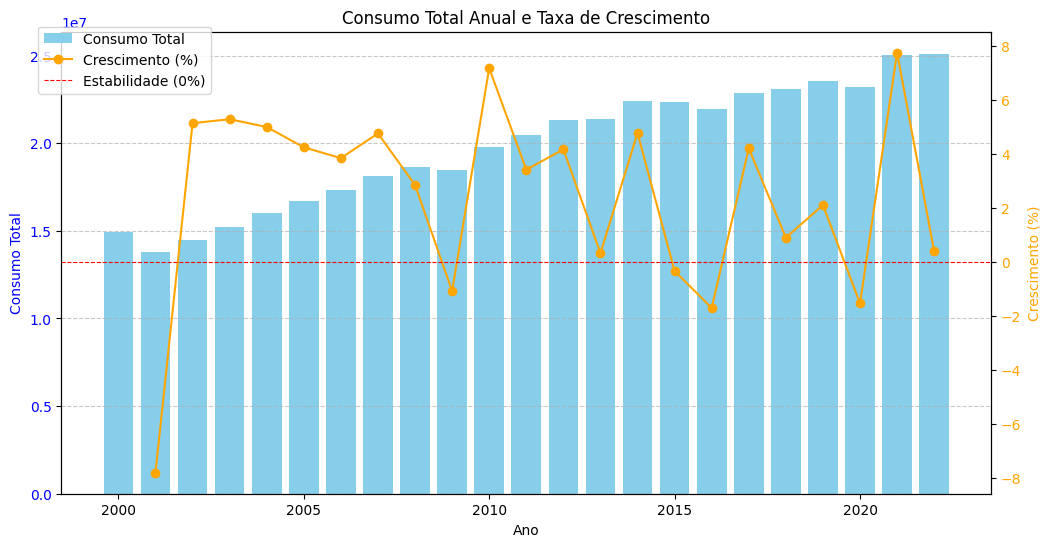

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para o consumo total anual
ax1.bar(annual_consumption.index, annual_consumption.values, color='skyblue', label='Consumo Total')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Consumo Total', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar o eixo secundário para a taxa de crescimento
ax2 = ax1.twinx()
ax2.plot(annual_growth.index, annual_growth.values, color='orange', marker='o', label='Crescimento (%)')
ax2.set_ylabel('Crescimento (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Estabilidade (0%)')

# Adicionar título e legendas
plt.title('Consumo Total Anual e Taxa de Crescimento')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
# plt.savefig('consumo_e_taxa_crescimento.png')
plt.show()


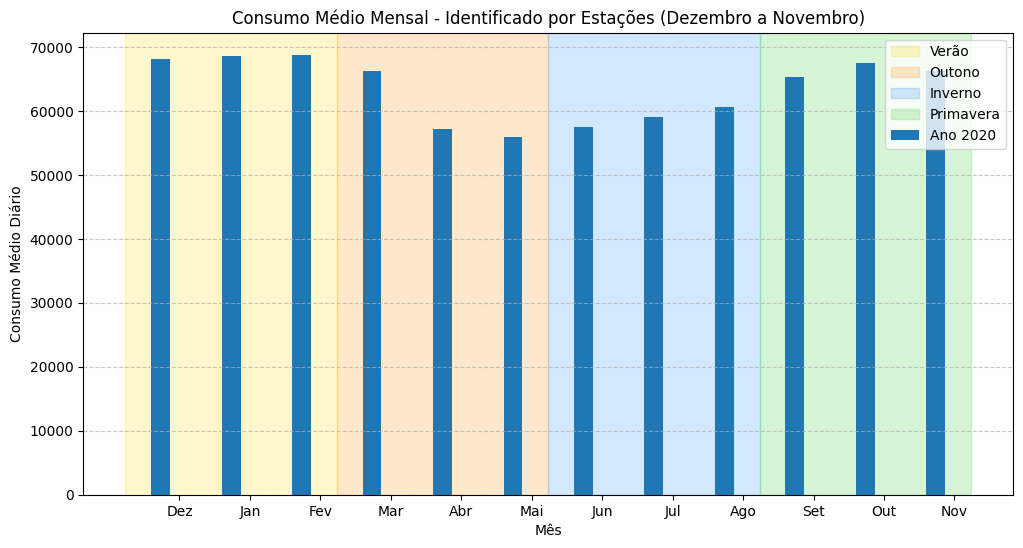

In [15]:
years = [2020]  
# Configurar a ordem dos meses começando em dezembro
month_order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
monthly_mean['month'] = pd.Categorical(monthly_mean['month'], categories=month_order, ordered=True)

# Ordenar o DataFrame pela nova ordem dos meses
monthly_mean = monthly_mean.sort_values('month')

# Definir as cores das estações
season_colors = {
    'Verão': '#FFD700',  # Amarelo
    'Outono': '#FF8C00',  # Laranja
    'Inverno': '#1E90FF',  # Azul
    'Primavera': '#32CD32'  # Verde
}

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Adicionar fundo colorido para as estações
for season in ['Verão', 'Outono', 'Inverno', 'Primavera']:
    months = {
        'Verão': [1, 2, 3],
        'Outono': [4, 5, 6],
        'Inverno': [7, 8, 9],
        'Primavera': [10, 11, 12]
    }[season]
    plt.axvspan(min(months) - 0.5, max(months) + 0.5, color=season_colors[season], alpha=0.2, label=season)

# Plotar os dados para cada ano
for i, year in enumerate(years):
    year_data = monthly_mean[monthly_mean['year'] == year]
    plt.bar(x + i * bar_width, year_data['daily_mean_demand'], width=bar_width, label=f'Ano {year}')

# Ajustar os rótulos do eixo X
plt.xticks(
    x + bar_width, 
    ['Dez', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov']
)

# Configurar o gráfico
plt.title('Consumo Médio Mensal - Identificado por Estações (Dezembro a Novembro)')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio Diário')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig('estacoes_do_ano.png')
plt.show()


C:\Users\eduar\AppData\Local\Temp\ipykernel_7340\1110249718.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'hour'] = filtered_data['index'].dt.hour
C:\Users\eduar\AppData\Local\Temp\ipykernel_7340\1110249718.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'hour'] = filtered_data['index'].dt.hour
C:\Users\eduar\AppData\Local\Temp\ipykernel_7340\1110249718.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

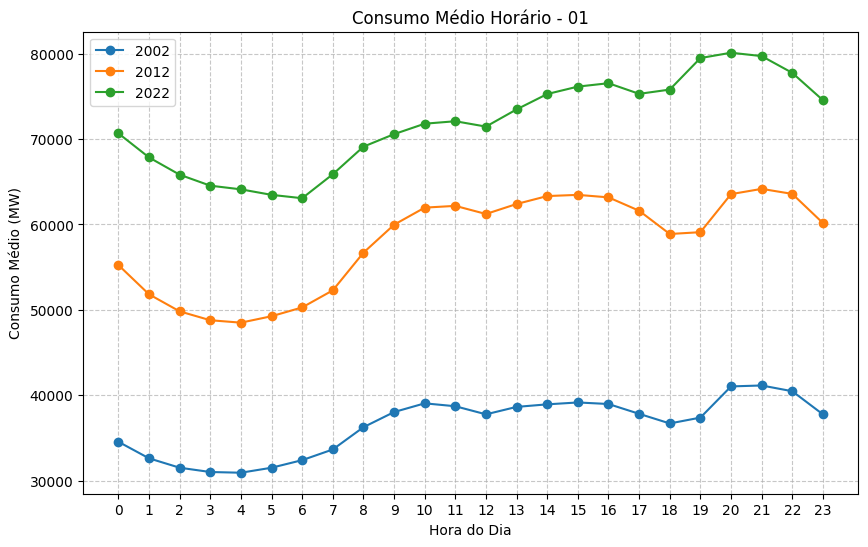

In [16]:
years = [2002, 2012, 2022]
month = 1  # Mês a ser analisado

plt.figure(figsize=(10, 6))

for year in years:
    # Filtrar os dados para o ano e mês específicos
    filtered_data = data[(data['index'].dt.year == year) & (data['index'].dt.month == month)]
    filtered_data.loc[:, 'hour'] = filtered_data['index'].dt.hour

    # Agrupar por hora e calcular a média
    hourly_mean = filtered_data.groupby('hour')['hourly_demand'].mean()

    # Adicionar ao gráfico
    plt.plot(hourly_mean.index, hourly_mean.values, marker='o', label=f'{year}')

# Configurar o gráfico
plt.title(f'Consumo Médio Horário - {month:02d}')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio (MW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
# plt.savefig('consumo_dia.png')
plt.show()


In [17]:
import pandas as pd

# Garantir que os dados estão ordenados por data
daily_mean = daily_mean.sort_values('date')

# Preparar a tabela com 30 entradas e 1 saída
window_size = 30
data = []

for i in range(window_size, len(daily_mean)):
    inputs = daily_mean['daily_mean_demand'].iloc[i-window_size:i].values  # Últimos 30 dias
    target = daily_mean['daily_mean_demand'].iloc[i]  # Dia 31
    data.append(list(inputs) + [target])

# Criar DataFrame
columns = [f'day_{i+1}' for i in range(window_size)] + ['target']
neural_net_data = pd.DataFrame(data, columns=columns)

# Exibir as primeiras linhas da tabela
neural_net_data.head()


,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,target
0,30736.529167,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,...,38240.433333,34345.833333,41049.875000,41703.370833,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167
1,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,...,34345.833333,41049.875000,41703.370833,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167,41924.566667
2,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167,...,41049.875000,41703.370833,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167,41924.566667,42002.120833
3,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167,42554.425000,...,41703.370833,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167,41924.566667,42002.120833,42586.733333
4,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167,42554.425000,42929.404167,...,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167,41924.566667,42002.120833,42586.733333,42888.333333


In [18]:
neural_net_data.shape

(8359, 31)

           day_1     day_2     day_3     day_4     day_5     day_6     day_7  \
day_1   1.000000  0.909127  0.829024  0.806164  0.802555  0.817746  0.886691   
day_2   0.909127  1.000000  0.909091  0.828951  0.806179  0.802593  0.817797   
day_3   0.829024  0.909091  1.000000  0.909063  0.828953  0.806187  0.802606   
day_4   0.806164  0.828951  0.909063  1.000000  0.909018  0.828882  0.806109   
day_5   0.802555  0.806179  0.828953  0.909018  1.000000  0.909023  0.828898   
day_6   0.817746  0.802593  0.806187  0.828882  0.909023  1.000000  0.909042   
day_7   0.886691  0.817797  0.802606  0.806109  0.828898  0.909042  1.000000   
day_8   0.963606  0.886740  0.817811  0.802531  0.806128  0.828932  0.909064   
day_9   0.883107  0.963622  0.886724  0.817724  0.802540  0.806158  0.828968   
day_10  0.811392  0.883083  0.963613  0.886675  0.817726  0.802553  0.806178   
day_11  0.793703  0.811389  0.883099  0.963607  0.886661  0.817702  0.802526   
day_12  0.792506  0.793774  0.811412  0.

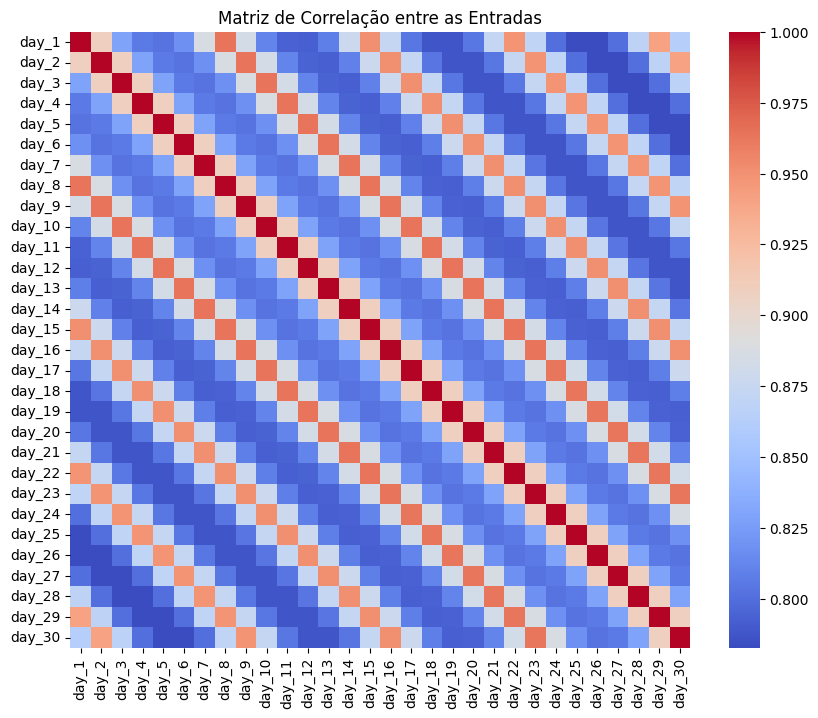

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas de entrada
input_columns = [col for col in neural_net_data.columns if 'day_' in col]
correlation_matrix = neural_net_data[input_columns].corr()

# Visualizar a matriz de correlação como tabela
print(correlation_matrix)

# Visualizar como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação entre as Entradas')
# plt.savefig('matriz30.png')
plt.show()


In [20]:
# Definir o número de dias mais recentes a serem usados
new_window_size = 7  # Por exemplo, usar apenas os últimos 10 dias

# Recriar a tabela com as novas entradas
data = []

for i in range(new_window_size, len(daily_mean)):
    inputs = daily_mean['daily_mean_demand'].iloc[i-new_window_size:i].values  # Últimos 7 dias
    target = daily_mean['daily_mean_demand'].iloc[i]  # Dia 8
    data.append(list(inputs) + [target])

# Criar novo DataFrame
columns = [f'day_{i+1}' for i in range(new_window_size)] + ['target']
reduced_neural_net_data = pd.DataFrame(data, columns=columns)

# Exibir as primeiras linhas da tabela ajustada
reduced_neural_net_data.head()


,day_1,day_2,day_3,day_4,day_5,day_6,day_7,target
0,30736.529167,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500
1,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333
2,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667
3,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667
4,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167


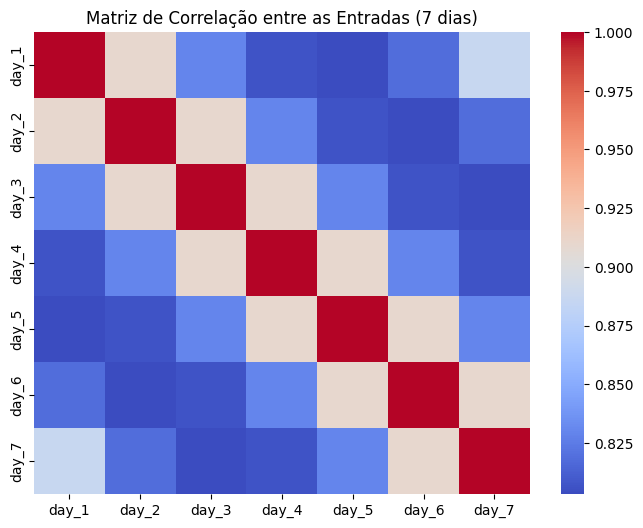

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas de entrada (dias)
input_columns = [col for col in reduced_neural_net_data.columns if 'day_' in col]

# Calcular a matriz de correlação
correlation_matrix = reduced_neural_net_data[input_columns].corr()

# Visualizar a matriz como heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação entre as Entradas (7 dias)')
# plt.savefig('matriz7.png')
plt.show()


C:\Users\eduar\AppData\Local\Temp\ipykernel_7340\2599490409.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


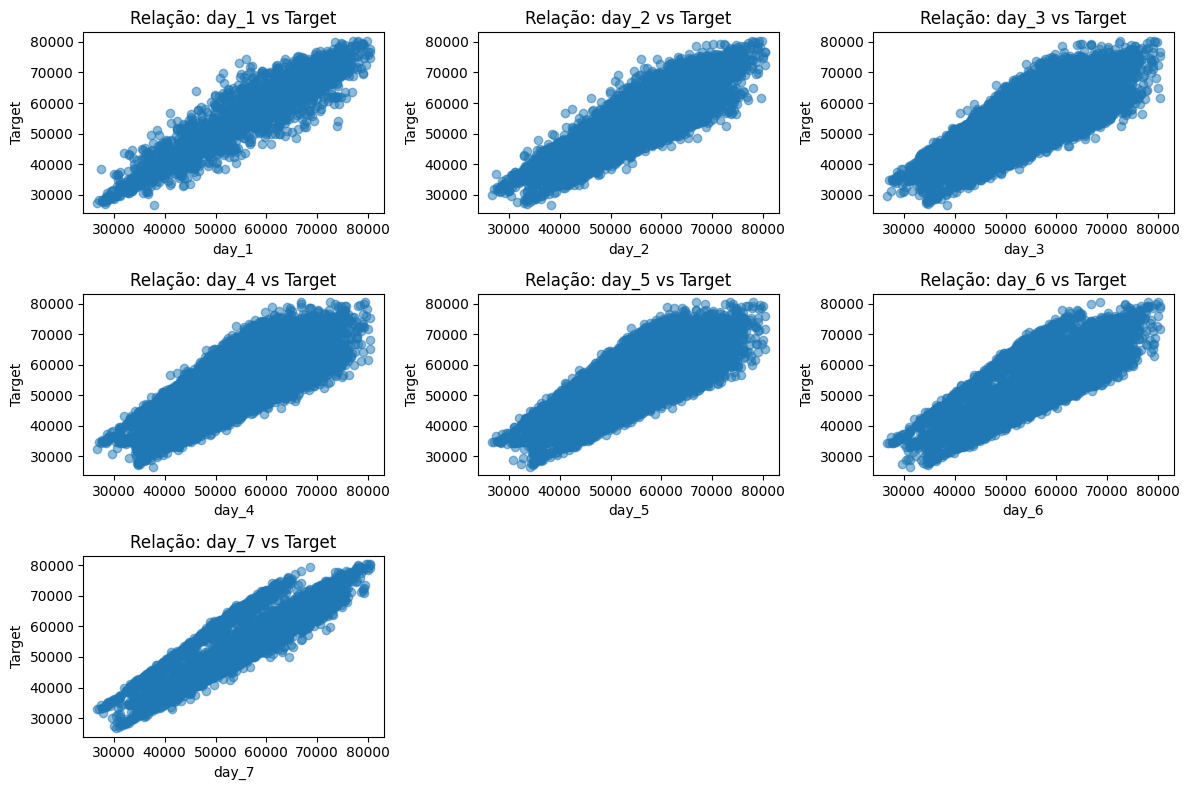

In [22]:
import matplotlib.pyplot as plt

# Criar um gráfico de dispersão para cada entrada
plt.figure(figsize=(12, 8))
for i, column in enumerate([col for col in reduced_neural_net_data.columns if 'day_' in col], start=1):
    plt.subplot(3, 3, i)  # Organizar os gráficos em 3 linhas x 3 colunas
    plt.scatter(reduced_neural_net_data[column], reduced_neural_net_data['target'], alpha=0.5)
    plt.title(f'Relação: {column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    # plt.savefig('scatterplot_denso.png')
    plt.tight_layout()

plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_7340\3490163868.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


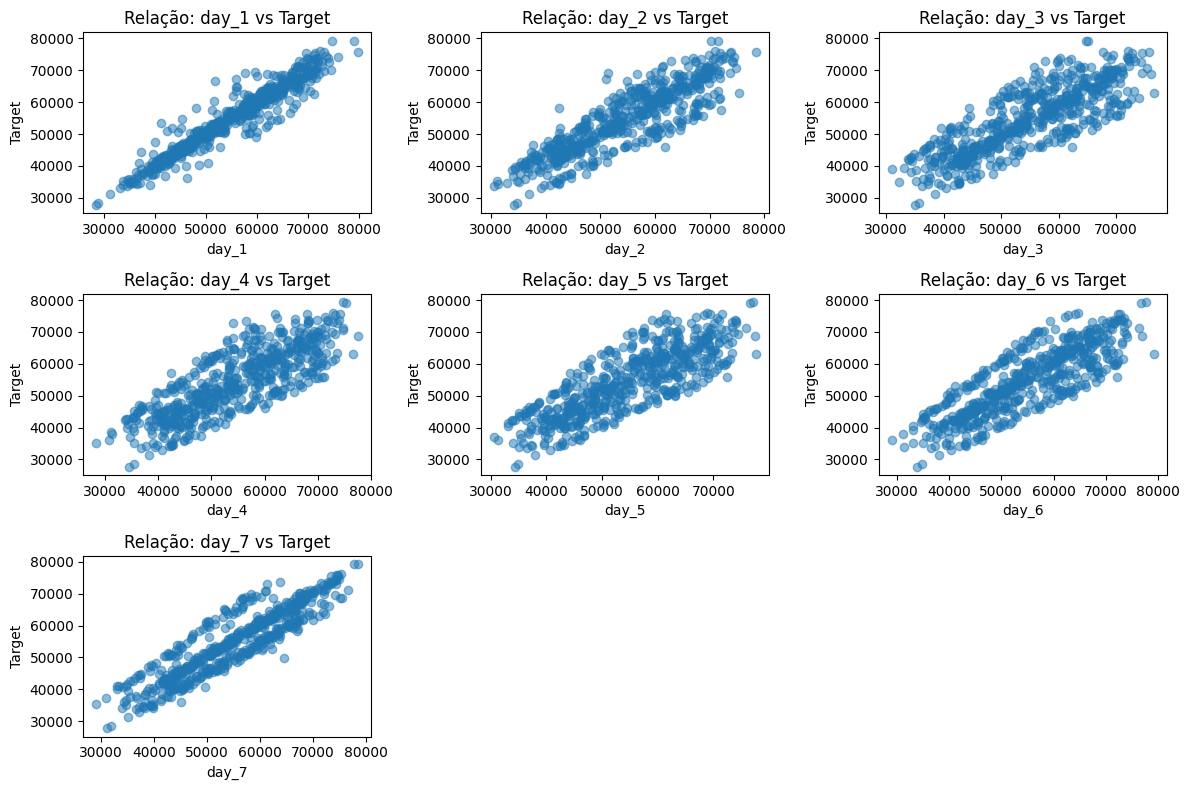

In [23]:
# Reduzir a tabela para 10% das linhas
sampled_data = reduced_neural_net_data.sample(frac=0.07, random_state=42)

# Gerar os gráficos de dispersão
plt.figure(figsize=(12, 8))
for i, column in enumerate([col for col in sampled_data.columns if 'day_' in col], start=1):
    plt.subplot(3, 3, i)  # Organizar os gráficos em 3 linhas x 3 colunas
    plt.scatter(sampled_data[column], sampled_data['target'], alpha=0.5)
    plt.title(f'Relação: {column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.tight_layout()

# plt.savefig('scatterplot_reduzido.png')
plt.show()


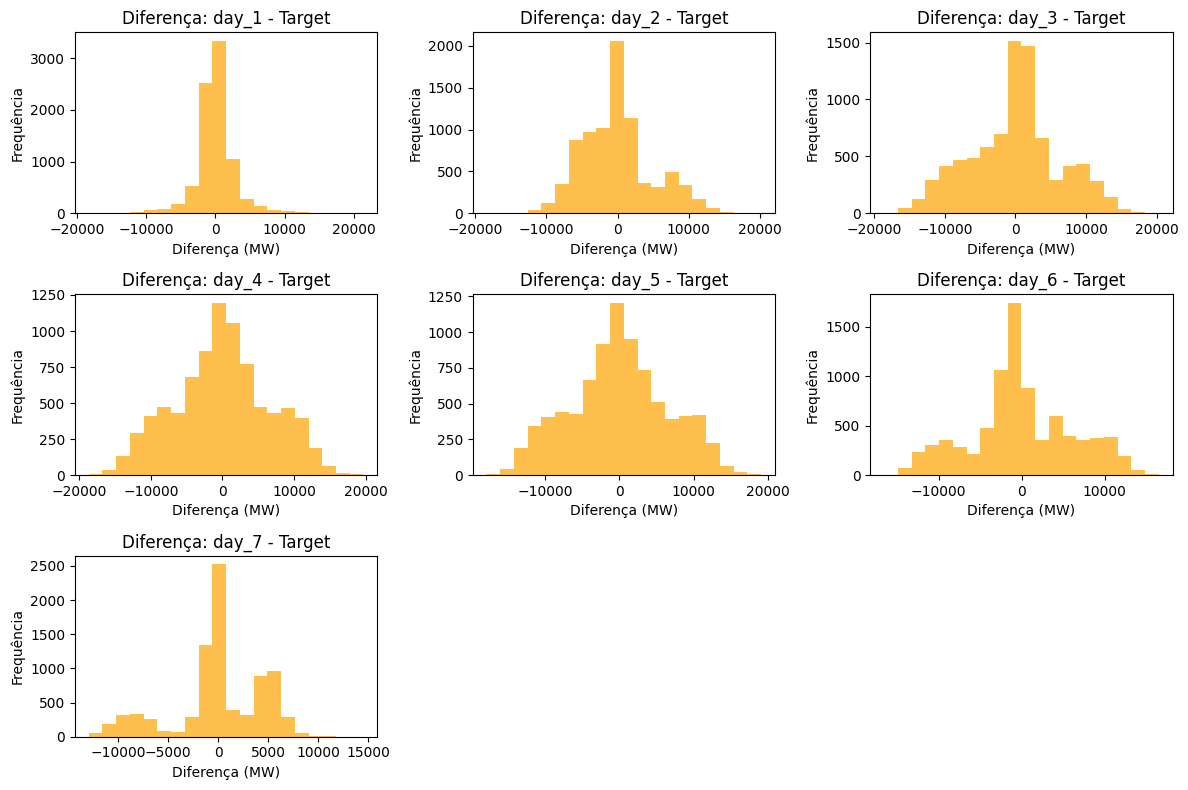

In [24]:
plt.figure(figsize=(12, 8))

# Para cada entrada, calcular e plotar a diferença
for i, column in enumerate([col for col in reduced_neural_net_data.columns if 'day_' in col], start=1):
    plt.subplot(3, 3, i)
    plt.hist(reduced_neural_net_data[column] - reduced_neural_net_data['target'], bins=20, color='orange', alpha=0.7)
    plt.title(f'Diferença: {column} - Target')
    plt.xlabel('Diferença (MW)')
    plt.ylabel('Frequência')

plt.tight_layout()
# plt.savefig('diferença_entrada_saida.png')
plt.show()


# Rede Neural

In [25]:
reduced_neural_net_data.head()

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,target
0,30736.529167,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500
1,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333
2,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667
3,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667
4,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167


In [27]:
from sklearn.model_selection import train_test_split

# Separar entradas (X) e saídas (y)
X = reduced_neural_net_data.iloc[:, :-1].values  # Colunas day_1 a day_7
y = reduced_neural_net_data.iloc[:, -1].values   # Coluna target

# Divisão inicial: Treino (70%) e Teste+Validação (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Divisão do conjunto temporário em Teste (15%) e Validação (15%)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Exibir tamanhos para confirmar
print(f"Tamanho Treino: {X_train.shape}")
# print(f"Tamanho Validação: {X_val.shape}")
print(f"Tamanho Teste: {X_test.shape}")


Tamanho Treino: (6705, 7)
Tamanho Teste: (1677, 7)


In [50]:
import pandas as pd
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential # criar a rede neural
from tensorflow.keras import backend as k # treinar a rede e fazer validação
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # configurar parametros

In [29]:
def criar_rede(optimizer, loss, kernel_initializer, activation, neurons, dropout_rate): # adicionando parametros a serem configurados
  k.clear_session() # tem que limpar sempre
  rede_neural = Sequential([
      tf.keras.layers.Input(shape = (7,)),
      tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.Dropout(rate=dropout_rate),
      tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.Dropout(rate=dropout_rate),
      tf.keras.layers.Dense(units=1, activation='linear')
  ])
  rede_neural.compile(optimizer=optimizer, loss=loss, metrics=['mae']) # metrics sempre em uma lista
  return rede_neural

In [30]:
rede_neural = KerasRegressor(model=criar_rede, verbose=0)

In [38]:
parametros = {
    'batch_size': [32],
    'epochs': [50, 100],
    'model__optimizer': ['adam', 'sgd'],
    'model__loss': ['mse', 'mae'],      
    'model__kernel_initializer': ['random_uniform', 'normal'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': [4, 16, 32],
    'model__dropout_rate': [0.2, 0.3]
}

parametros

{'batch_size': [32],
 'epochs': [50, 100],
 'model__optimizer': ['adam', 'sgd'],
 'model__loss': ['mse', 'mae'],
 'model__kernel_initializer': ['random_uniform', 'normal'],
 'model__activation': ['relu', 'tanh'],
 'model__neurons': [4, 16, 32],
 'model__dropout_rate': [0.2, 0.3]}

In [43]:
random_search = RandomizedSearchCV(
    estimator=rede_neural,
    param_distributions=parametros,
    n_iter=100, 
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [45]:
random_search = random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\eduar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-53901.94715387 -53182.47143569 -54299.23129287 -54133.25300104
             nan -54298.79667678 -51991.48677637 -40482.93544565
  -6775.46573472  -4839.19310069 -54333.59782043 -41410.59036284
 -54246.8885395              nan  -5798.01183358  -8887.87338321
 -54299.06581893 -53673.22033706 -24261.71627054             nan
  -9071.24000903 -17968.17074976 -39681.87273236 -54127.84522007
 -53901.76625584 -53905.42156997  -4346.42232604 -54129.30460626
 -54247.32946029  -8905.87925634 -54132.78022272 -49752.28381544
 -54022.65006525 -54247.13824735  -8875.31446868 -54332.84194579
 -54133.96689367  -3682.56983788  -4812.35564552 -54127.73919692
 -39770.74460161 -13106.87011622 -11711.12744073 -40368.18891426
 -54299.1052629              nan             nan -53181.33992921
 -54333.17220321 -13842.73449044  -8881.666990

In [46]:
# Avaliar o melhor modelo no conjunto de teste
best_model = random_search.best_estimator_  # Recupera o melhor modelo
test_score = best_model.score(X_test, y_test)  # Avalia o desempenho no conjunto de teste

# Exibir os resultados
print("Melhor modelo:", random_search.best_params_)
print("Desempenho no conjunto de teste (MAE):", -test_score)

Melhor modelo: {'model__optimizer': 'adam', 'model__neurons': 32, 'model__loss': 'mse', 'model__kernel_initializer': 'random_uniform', 'model__dropout_rate': 0.2, 'model__activation': 'relu', 'epochs': 100, 'batch_size': 32}
Desempenho no conjunto de teste (MAE): -0.9402549417705284


In [47]:
best_model.model_.save("melhor_modelo.h5")

In [48]:
best_model.model_.save("melhor_modelo.keras")

In [53]:
parametros = {
    'batch_size': [32],
    'epochs': [50, 100],
    'model__optimizer': ['adam', 'sgd'],
    'model__loss': ['mse', 'mae'],      
    'model__kernel_initializer': ['random_uniform', 'normal'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': [4, 16, 32],
    'model__dropout_rate': [0, 0.2, 0.3]
}

parametros

{'batch_size': [32],
 'epochs': [50, 100],
 'model__optimizer': ['adam', 'sgd'],
 'model__loss': ['mse', 'mae'],
 'model__kernel_initializer': ['random_uniform', 'normal'],
 'model__activation': ['relu', 'tanh'],
 'model__neurons': [4, 16, 32],
 'model__dropout_rate': [0, 0.2, 0.3]}

In [54]:
grid_search = GridSearchCV(
    estimator=rede_neural,
    param_grid=parametros,
    scoring='neg_mean_absolute_error',  # Métrica para regressão
    cv=5,  # Validação cruzada
    verbose=1,
    n_jobs=-1
)

In [ ]:
best_model = grid_search.best_estimator_  # Recupera o melhor modelo ajustado
test_score = best_model.score(X_test, y_test)  # Avalia o desempenho do melhor modelo

# Exibir os resultados
print("Melhor modelo:", grid_search.best_params_)
print("Desempenho no conjunto de teste (MAE):", -test_score)

In [ ]:
best_model.model_.save("melhor_modelo_grid.h5")
best_model.model_.save("melhor_modelo_grid.keras")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
